<a href="https://colab.research.google.com/github/abbddos/AGENCI_MONITORING_AUTOMATION/blob/main/NB%20classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAIVE BAYES TEXT CLASSIFIER.

This notebook explains how the multinomial Naive Bayes (MultinomialNB) algorithm is used for the purpose of classifying free text(s) taken either from sorted files or from a classified dataset. 

## Required libraries:

In this notebook you will need:
* Pandas to read, manipulate and store your data in dataframes.
* Numpy to create numerical arrays needed for the MultinomialNB algorithm to process.
* Matplotlib for plotting data.
* Seaborn for plotting data (optional).
* Regular Expression (re) for text manipulation: removing tags, puctuations and unnecessary marks.
* Natural Language Tool Kit (nltk).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

### NLTK functions:

The following functions were also imported form nltk library to drop stopwords, lemmatize vocabulary and create tokens. Necessary datasets from nltk were also downloaded. _(This might not work directly on Windows.)_

In [2]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Finally, vectorization, train - test split, accuracy scoring and testing and of course MultinomialNB functionalities were imported form sklearn.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

## Downloading dataset:

The dataset had already been downloaded and loaded to my google account. It was imported as a pandas dataframe and to make things faster, only 100 lines were randomly selected from it. The dataset itself contains short articles and their categories put in a csv file.

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BBC News Train.csv')
dataset = dataset.sample(n=100, random_state=1)
dataset.head()

,ArticleId,Text,Category
91,1756,2d metal slug offers retro fun like some drill...,tech
1103,1108,blair stresses prosperity goals tony blair say...,politics
909,1955,weak dollar trims cadbury profits the world s ...,business
683,63,court rejects $280bn tobacco case a us governm...,business
561,293,christmas song formula unveiled a formula for...,entertainment


In [6]:
dataset.shape

(100, 3)

## Data processing:

In order to create a correct classifier, the exact categories in which the dataset is categoriezed needed to be determined. For that, a value counts was implemented on the "Category" column in the dataset.

In [7]:
dataset['Category'].value_counts()

sport            23
politics         21
business         20
tech             18
entertainment    18
Name: Category, dtype: int64

After that, each category was assigned a number from 0 to 4.

In [8]:
dataset['CategoryID'] = dataset['Category'].factorize()[0]
dataset.head()

,ArticleId,Text,Category,CategoryID
91,1756,2d metal slug offers retro fun like some drill...,tech,0
1103,1108,blair stresses prosperity goals tony blair say...,politics,1
909,1955,weak dollar trims cadbury profits the world s ...,business,2
683,63,court rejects $280bn tobacco case a us governm...,business,2
561,293,christmas song formula unveiled a formula for...,entertainment,3


In [9]:
category = dataset[['Category', 'CategoryID']].drop_duplicates().sort_values('CategoryID')
category

,Category,CategoryID
91,tech,0
1103,politics,1
909,business,2
561,entertainment,3
980,sport,4


A little bar chart was made to show how many entries for each category was in the dataset. This step is not really necessary, you can skip it if you like.

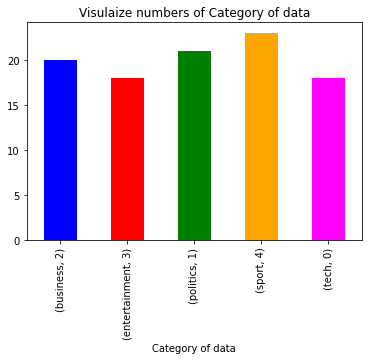

In [10]:
dataset.groupby('Category').CategoryID.value_counts().plot(kind='bar', color = ["blue", "red", "green", "orange", "magenta"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

In [11]:
text = dataset["Text"]
text.head(10)

91      2d metal slug offers retro fun like some drill...
1103    blair stresses prosperity goals tony blair say...
909     weak dollar trims cadbury profits the world s ...
683     court rejects $280bn tobacco case a us governm...
561     christmas song formula  unveiled a formula for...
1341    lacroix label bought by us firm luxury goods g...
1480    qantas sees profits fly to record australian a...
1048    watchdog probes e-mail deletions the informati...
885     lord scarman  93  dies peacefully distinguishe...
1475    budget to set scene for election gordon brown ...
Name: Text, dtype: object

In [12]:
category = dataset['Category']
category.head(10)

91               tech
1103         politics
909          business
683          business
561     entertainment
1341         business
1480         business
1048         politics
885          politics
1475         politics
Name: Category, dtype: object

## Data preparation:

A series of functions was designed and implemented to the dataset to make sure the Multinomial Naive Bayes classifier works well. First of which is to remove any HTML tags from the context of the articles included in the dataset. Removing any special characters or emojis is also required as well as pucturations. Next, each article was moved to lowercase, No capital letters should be included in the text. In order to make things simpler, stop words were also removed, and each word in each article was lemmantized. This will result a very crude, but understandable text.

In [13]:
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)

def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews

def convert_lower(text):
   return text.lower()

def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]

def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])

dataset['Text'] = dataset['Text'].apply(remove_tags).apply(special_char).apply(convert_lower)
dataset['Text'] = dataset['Text'].apply(remove_stopwords).apply(lemmatize_word)

After the necessary manipulation functions were created, the dataset itself was divided into two arrays using numpy. The first array contains the manipulated articles and the second one contains the category ids created earlier (The values from 0 to 4 assigned to each category).

In [14]:
x = dataset['Text']
y = dataset['CategoryID']

Since the MultinomialNB algorithm only deals with numerical values, text values in the articles should be converted into numbers. This is done using a vecorizer. A vectorizer assigns numerical values to text entries which makes it easier for machine learning algorithms, such as MultinomialNB, decisiotn trees and others, to deal with textual data.

In [15]:
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryID.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (100, 5000)
y.shape =  (100,)


The dataset resulting from creating the arrays was then split into training and testing sets as follows:

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

70
30


## Building the model:

A model was built using the MultinomialNB object from sklearn library imported above, and then fit to the training dataset created in the previous step. The test set of the data was then used to determine the accuracy of the model after fitting. It appeared that the accuracy score of the model reached 93%, which was more than acceptable for such classifiers.

_Note that the alpha value of the MultinomialNB classifier object is 0.5. Normally it should be 1, but for some reason it did not make any good predictions, and always gave values one step higher than expected. for example when an article of category 3 was passed, the classifer classified it as category 4. When assigning 0 to the alpha value, the opposite happened and no correct predictions were made. As such, the alpha value was incremented by 0.1 and tested several times until accurate predictions resulted at alpha = 0.5_

In [17]:
mdl = MultinomialNB(alpha=0.5,fit_prior=True)
mdl.fit(x_train, y_train)
oneVsRest = OneVsRestClassifier(mdl)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

precision, recall, f1score, support = score(y_test, y_pred, average='micro')

print(f'Test Accuracy Score of Basic Naive Bayez classifier: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1score}')


Test Accuracy Score of Basic Naive Bayez classifier: % 93.33
Precision : 0.9333333333333333
Recall : 0.9333333333333333
F1-score : 0.9333333333333333


## Applying the model:

The following function was created to pass articles of any type and see how the classifier works.

In [18]:
MNB = MultinomialNB(alpha=0.5,fit_prior=True)
MNB.fit(x_train, y_train)
def Get_prediction(article):
  pred = cv.transform([article])
  score = MNB.predict(pred)
  result = ""
  if score == [0]:
    result = "Tech"
  elif score == [1]:
    result = "Politics"
  elif score == [2]:
    result = "Business"
  elif score == [3]:
    result = "Entertainment"
  elif score == [4]:
    result = "Sports"
  return (result, score)

The following article from CNN was copied and passed the above-mentioned function.

In [19]:
article = """
In a phone call late on Thursday, the Russian president said such sanctions would be a "colossal mistake".

Mr Biden, meanwhile, told Mr Putin that the US and its allies would respond decisively to any invasion of Ukraine.

The call, requested by Russia, was the pair's second such conversation this month and lasted for almost an hour.

It marked the latest effort to defuse tensions over Ukraine's eastern border with Russia, where Ukrainian officials say more than 100,000 Russian troops have been sent.

The build-up has prompted concern in the West, with the US threatening Mr Putin with sanctions "like none he's ever seen" if Ukraine comes under attack.

Russia, however, denies it is planning to invade the country and says the troops are there for exercises. It says it is entitled to move its troops freely on its own soil.

Although the two sides exchanged warnings during the call, Russian foreign policy adviser Yuri Ushakov told reporters shortly after that Mr Putin was "pleased" with the conversation. He added that it had created a "good backdrop" for future talks.

A senior US official, who spoke on condition of anonymity, said the tone had been "serious and substantive."

"President Biden reiterated that substantive progress in these dialogues can occur only in an environment of de-escalation," White House Press Secretary Jen Psaki said.

"He made clear that the United States and its allies and partners will respond decisively if Russia further invades Ukraine," she added.

US and Russian officials are set to meet for in-person talks in Geneva next month, and the White House said Mr Biden urged his Russian counterpart to pursue a diplomatic solution.

In a holiday message before Thursday's call, Mr Putin told Mr Biden he was "convinced" the pair could work together based on "mutual respect and consideration of each other's national interests".

His spokesman, Dmitry Peskov, said Moscow was "in the mood for a conversation"."""

And there you go... the article was political and the classifier gave correct prediction.

In [20]:
res = Get_prediction(article)
print(res)

('Politics', array([1]))


Another test...

In [21]:
entertainment = """
Rupert Grint absolutely loves being a dad. The 33-year-old actor touched on how fatherhood has changed him while promoting season 3 of his Apple TV+ show, Servant. From M. Night Shyamalan, the thriller follows a mourning Philadelphia couple whose marriage is up in the air after an unspeakable tragedy. The rift then opens the door for a mysterious force to enter their home.

"[Fatherhood], it's definitely changed my perspective," Grint told ET's Lauren Zima, before touching on the show's theme of how far a person would go for their child. "Since becoming a dad, kind of midway through, just to really have a better sense of what that can do to a family, that kind of level of loss is unimaginable. And yeah, I mean, it's quite hard for me to kind of really completely face that directly. I just find it just incredible."

"It's a weird place to be, especially when Wednesday first came. I remember I brought her to the set this season," he continued. "She thought she was at Sesame Street, which was very far away from Sesame Street. But yeah, it's really interesting."""

res = Get_prediction(entertainment)
print(res)

('Entertainment', array([3]))


And another...

In [22]:
sprt = """
Brown, whose previous best was 46 against the New York Knicks in October, scored 21 points in the fourth quarter.

It helped the Celtics come from 14 points down with four minutes and 20 seconds left in regulation time.

He started overtime with his fifth three-pointer of the game, and also had 11 rebounds and four assists.

"I was just trying to be aggressive the entire time," he said.

"My team-mates encouraged me to take the shots. I feel like I took some good looks and they went down tonight."

Brown's layup with 38 seconds left in regulation levelled the score at 98-98 and he scored again to put Boston up 100-98 with 30 seconds left, but Tim Frazier scored for Orlando to force overtime.

Both teams were missing their leading scorers with Orlando's Cole Anthony sidelined by a sprained ankle while Boston's Jayson Tatum missed a fourth straight game because of Covid-19 concerns.

Elsewhere, Dallas Mavericks star Luka Doncic marked his return from a 10-game absence with 14 points, 10 assists and nine rebounds in their 95-86 away victory over the Oklahoma City Thunder.

The 22-year-old had missed five games with an ankle injury and then five more because of Covid.

"My chest was burning," said the Slovenian, who played 31 minutes on his comeback. "It was a weird feeling, but happy. Very happy."

Thunder rookie Josh Giddey became the youngest NBA player to post a triple-double with 17 points, 14 assists and 13 rebounds.

Aged 19 years and 84 days, Giddey surpassed LaMelo Ball's record of 19 years and 140 days, and also came up with four steals in his first game back after missing the last three for Covid reasons.
"""

res = Get_prediction(sprt)
print(res)

('Sports', array([4]))
